Computaton of group delay resulted from gain control as in Berry's model
by using a wave packet

adpated from:

https://dspillustrations.com/pages/posts/misc/group-delay-and-phase-delay-example.html


Sept 13, 2021 Created by CKC

In [1]:
import numpy as np
import math
import scipy as sp
from scipy import sparse
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time

In [2]:
from scipy.fftpack import fft, fftfreq
def FFT_quick(data, dt, center_data = False, center_faxis = True):
    if center_data:
        xft=fft(data-np.mean(data))
    else:
        xft=fft(data)
    xft_nor=xft/len(xft)
    freq=fftfreq(len(data), d=dt)

    if center_faxis:
        xft_nor = np.append( xft_nor[np.argmin(freq):],xft_nor[:np.argmin(freq)] )
        freq = np.append( freq[np.argmin(freq):], freq[:np.argmin(freq)] )
    return freq,xft_nor

In [3]:
def angular_gradient(x):
    diffx= np.gradient(x)
    diffx[np.abs(diffx)>0.6*np.pi] -= np.pi*diffx[np.abs(diffx)>0.6*np.pi]/abs(diffx[np.abs(diffx)>0.6*np.pi])
    return diffx

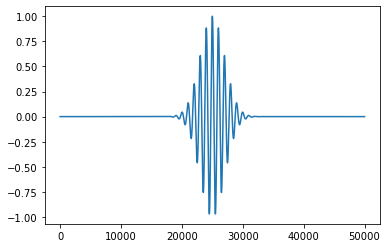

In [4]:
Tot = 50
dt = 0.001
# Fs = 100
f0 = 1     # The resonant frequency of the circuit

tAxis = np.arange(0, Tot, dt)
sigma = 2
envelope = np.exp( -0.5*((tAxis-Tot/2)/sigma)**2 )
sinWave = np.cos(2*np.pi*f0*tAxis)
packetWave = envelope * sinWave
plt.plot(packetWave)

(0.0, 2.0)

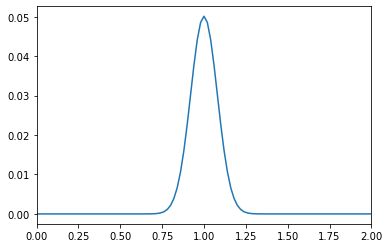

In [5]:
fAxis,FT_packetWave=FFT_quick(packetWave, dt)
plt.plot(fAxis, np.abs(FT_packetWave))
plt.xlim(0,2)

In [6]:
theory_FT_packetWave = -1j*sigma*np.sqrt(np.pi/2)*(np.exp(-2 *sigma**2 *np.pi**2 *(fAxis-f0)**2 )-np.exp(-2 *sigma**2 *np.pi**2 *(fAxis+f0)**2))*np.exp(-1j*2*np.pi*fAxis*Tot/2)

(-2.0, 2.0)

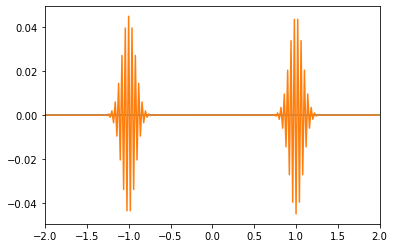

In [7]:
# plt.plot(freq, FT_packetWave.real)
# plt.plot(freq, theory_FT_packetWave.real*0.02)

plt.plot(fAxis, FT_packetWave.imag)
plt.plot(fAxis, theory_FT_packetWave.imag*0.018)
plt.xlim(-2,2)

In [24]:
x = packetWave.copy()
y = x.copy() # output signal

gain =np.ones_like(x)
delay = int(1500)
B = 5

for i in range(delay,len(x)):
    gain[i] = 1/(1+B*y[i-delay]**2)
    y[i]= gain[i]*x[i]

In [25]:
# # T = 10

# # Fs = 0.01
# # f0 = 1     # The resonant frequency of the circuit

# # dt = 1/Fs
# # t = np.arange(0, T, dt)
# # sigma = 2
# # envelope = np.exp( -0.5*((t-5)/sigma)**2 )
# # sig0 = np.sin(2*np.pi*f0*t)+1
# # sig = envelope * sig0


# nstep = len(sig)
# x = sig.copy() # input signal
# gain =np.ones(nstep)
# delay = int(10/0.05)
# delay = int(800)
# B =2
# y = x.copy() # output signal

# # gain control loop

# for i in range(delay,nstep):
#     gain[i] = 1/(1+B*y[i-delay]**2)
#     y[i]= gain[i]*x[i]


# # use the original signal's peak position as the peak positions
# # in the output signal. That is: assumed no phase shift between
# # input and output (???)

# npeak = int(T*f0)
# tpeak = np.zeros(npeak)
# for i in range(npeak):
#     tpeak[i] = (4*i+1)/4/f0

# # index to the peak position assuming no phase lag
# index = np.array(tpeak*Fs).astype(int)

# # arrays with peak heights
# ypeak_height = y[index]
# xpeak_height = x[index]
# gain_at_peak = gain[index]

# plt.plot(xpeak_height)
# plt.plot(ypeak_height)
# plt.plot(gain_at_peak)

# group_delay = np.argmax(ypeak_height)-np.argmax(xpeak_height)
# print('group delay =',group_delay/f0, 's')

(25000.0, 30000.0)

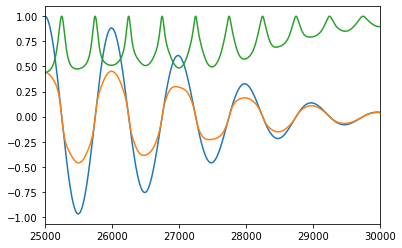

In [27]:
plt.plot(x)
plt.plot(y)
plt.plot(gain)
plt.xlim(25000, 30000)

(0.0, 2.0)

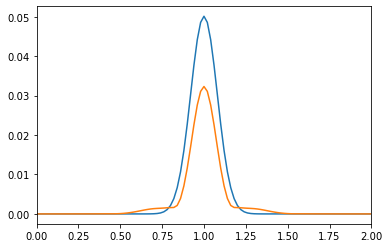

In [28]:
fAxis,FT_x=FFT_quick(x, dt)
fAxis,FT_y=FFT_quick(y, dt)
plt.plot(fAxis, np.abs(FT_x))
plt.plot(fAxis, np.abs(FT_y))
plt.xlim(0,2)

In [29]:
H = FT_y/FT_x
G = np.abs(H)
Phi = np.angle(H)
delta = -angular_gradient(x)/np.mean(np.diff(fAxis))
PhaseDelay = -Phi/fAxis

C:\Users\hydro_leo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


(0.0, 20.0)

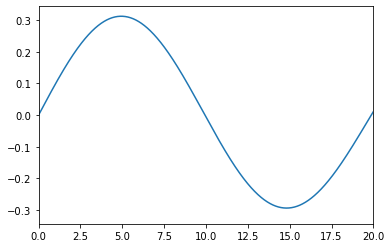

In [30]:
# plt.plot(fAxis, Phi)
plt.plot(fAxis, delta)
# plt.plot(fAxis, PhaseDelay )
plt.xlim(0,20)